In [1]:
import networkx as nx
from community import best_partition

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 1.构造一个简单的图
G = nx.Graph()

G.add_edges_from([
    (1,2),
    (1,3),
    (1,4),
    (5,6),
    (5,7),
    (5,8),
    (5,9),
    (15,16),
    (15,17),
    (15,18),
    (15,19),
    (150,160),
    (150,170),
    (150,180),
    (150,190),
])

In [4]:
partition = best_partition(G)

partition

{1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 2,
 6: 2,
 7: 2,
 8: 2,
 9: 2,
 15: 3,
 16: 3,
 17: 3,
 18: 3,
 19: 3,
 150: 0,
 160: 0,
 170: 0,
 180: 0,
 190: 0}

In [5]:
len(set(partition.values())) # 社区数量

4

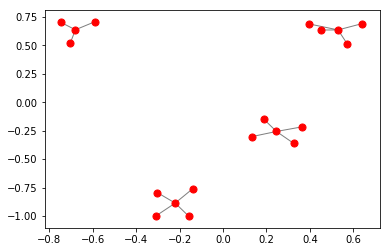

In [6]:
# 画图
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 50)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

### 从pandas建图

In [15]:
import pandas as pd

In [16]:
edges = pd.DataFrame({'source': [0, 1, 2],
                       'target': [2, 2, 3],
                       'weight': [3, 4, 5],
                       'color': ['red', 'blue', 'blue']})
# G = nx.from_pandas_edgelist(edges, edge_attr=["weight", "color"])
G = nx.from_pandas_edgelist(edges, edge_attr=True) # edge_attr=True: 把source target之外的字段都作为边的属性

In [17]:
G.adj

AdjacencyView({0: {2: {'color': 'red', 'weight': 3}}, 1: {2: {'color': 'blue', 'weight': 4}}, 2: {0: {'color': 'red', 'weight': 3}, 1: {'color': 'blue', 'weight': 4}, 3: {'color': 'blue', 'weight': 5}}, 3: {2: {'color': 'blue', 'weight': 5}}})

### 性能测试

In [13]:
%%time
node_num = 100000
edge_num = 100000
p = 1.*edge_num/node_num**2
G = nx.erdos_renyi_graph(n=node_num, p=p)

1e-05
CPU times: user 12min 21s, sys: 2.28 s, total: 12min 24s
Wall time: 12min 22s


In [12]:
%%time
partition = best_partition(G)

CPU times: user 51.2 s, sys: 336 ms, total: 51.6 s
Wall time: 51.5 s


In [14]:
%%time
node_num = 1000000
edge_num = 1000000
p = 1.*edge_num/node_num**2
G = nx.erdos_renyi_graph(n=node_num, p=p)

KeyboardInterrupt: 

In [ ]:
%%time
partition = best_partition(G)